# Quantum ML

Install the required packages by running the following codes:

In [1]:
! pip install qiskit

In [ ]:
! pip install qiskit-aer

In [3]:
! pip install pylatexenc

In [4]:
import qiskit
print(qiskit.__version__)

1.4.3


# Quantum Principal Component Analysis (QPCA)
#### **Objectives**
    - Understand the basics of PCA in classical and quantum contexts.
    - Learn about quantum state preparation and density matrices.
    - Explore the quantum PCA algorithm using Qiskit.
    - Work through hands-on coding examples.
    - Solve exercises to reinforce understanding.

### Classical PCA Recap
Before diving into Quantum Principal Component Analysis (QPCA), it's essential to understand Principal Component Analysis (PCA) in the classical (non-quantum) context. PCA is a widely-used dimensionality reduction technique that projects high-dimensional data into a lower-dimensional space while preserving as much variance (information) as possible.

Why do we use PCA?

* To reduce computational costs when dealing with high-dimensional data.
* To visualize high-dimensional data in 2D or 3D.
* To de-noise data and extract its most significant features.

Steps:

* Compute the covariance matrix of the data.
* Calculate its eigenvectors and eigenvalues.
* Select the top k eigenvectors corresponding to the largest eigenvalues.
* Project the data onto this new subspace.

**Mathematical Overview:**

Given a dataset matrix X :

- Covariance matrix: $$\left( C = \frac{1}{n} X^T X \right)$$
- Eigen decomposition: $$\left( C = V \Lambda V^T \right)$$
- Select top-k eigenvectors $$\left( V_k \right)$$ for dimensionality reduction.

The following Python code demonstrates a simple example of classical PCA using *scikit-learn*.



**Loading all the required packages.**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Creating a sample 3D dataset  to perform PCA.**

In [6]:
# Generate synthetic 3D data
np.random.seed(42)
mean = [0, 0, 0]
cov = [[3, 1, 1], [1, 2, 0.5], [1, 0.5, 1]]
X = np.random.multivariate_normal(mean, cov, 100)

**Plotting the data generated**

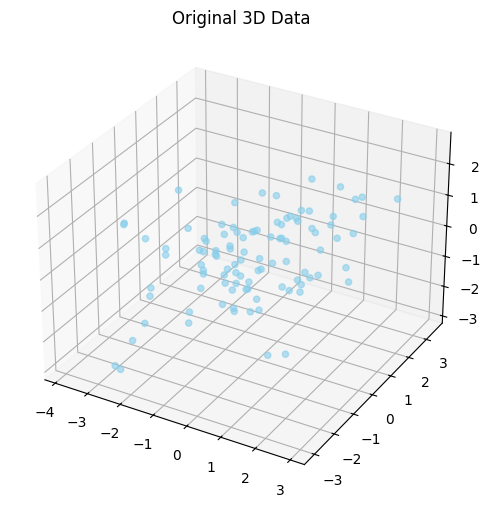

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color='skyblue', alpha=0.6)
ax.set_title("Original 3D Data")
plt.show()

**Standardize the Data** <br>
PCA works best when the data is centered (mean = 0).
<br>sklearn provides StandardScaler to center and scale features.

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Apply PCA with number of components = 2** <br>
This is to reduce the 3 dimensional data to 2 dimensions.

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Principal Components (Eigenvectors):\n", pca.components_)

Explained Variance Ratio: [0.55851855 0.26281416]
Principal Components (Eigenvectors):
 [[ 0.58384642  0.50717592  0.63395263]
 [-0.54706648  0.82273115 -0.15437529]]


*   explained_variance_ratio_ :  tells how much variance each principal component captures.
*   components_ : contains the top eigenvectors (each row = a principal axis).

**Visuaize the 2D projected data**

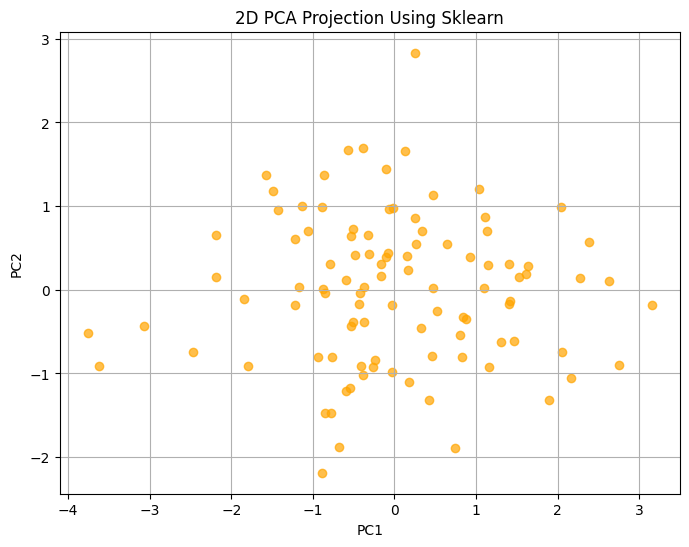

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='orange', alpha=0.7)
plt.title("2D PCA Projection Using Sklearn")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

### Quantum PCA deep-dive

**Quantum Principal Component Analysis (QPCA)** leverages quantum computing to perform PCA on a quantum state. The key idea is to estimate the eigenvalues and eigenvectors of a quantum density matrix using quantum operations.

The density matrix ρ is decomposed as:

  ρ = ∑ᵢ λᵢ |ϕᵢ⟩⟨ϕᵢ|

where λᵢ are the eigenvalues and |ϕᵢ⟩ are the eigenvectors.

The QPCA algorithm consists of the following steps:

* Preparing multiple copies of the density matrix ρ
* Applying the Quantum Phase Estimation (QPE) algorithm
* Measuring to estimate the eigenvalues of ρ

In [11]:
# Simplified Quantum Principal Component Analysis Implementation for 2x2 Matrices

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg

# Qiskit imports
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import DensityMatrix, Operator, Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import QFT
from qiskit.circuit import Parameter, QuantumRegister, ClassicalRegister

# Enable better visualization for Colab
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

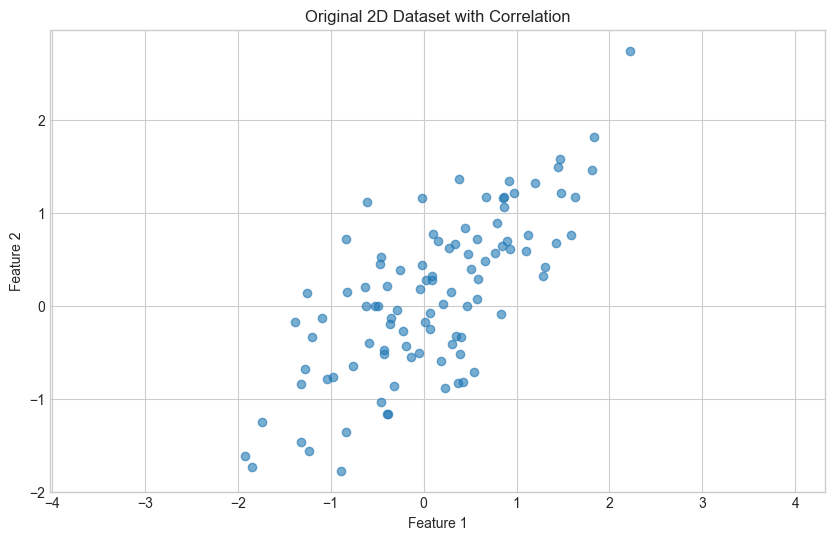

In [12]:
# 1. Generate a simple 2D dataset with correlation
np.random.seed(42)  # For reproducibility
num_points = 100
mean = [0, 0]
cov = [[1.0, 0.8],
       [0.8, 1.0]]  # Covariance matrix with correlation

# Generate the dataset
data = np.random.multivariate_normal(mean, cov, num_points)

# Plot the raw data
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.6)
plt.title('Original 2D Dataset with Correlation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.axis('equal')
plt.show()

In [13]:
# 2. Compute the covariance matrix
# Center the data
data_centered = data - np.mean(data, axis=0)
# Calculate covariance matrix
cov_matrix = np.cov(data_centered, rowvar=False)
print("Classical Covariance Matrix:")
print(cov_matrix)

Classical Covariance Matrix:
[[0.77630465 0.56017324]
 [0.56017324 0.7431292 ]]


In [14]:
# 3. Classical PCA for comparison
# Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
# Sort eigenvalues and corresponding eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Classical PCA results:")
print("Eigenvalues:", eigenvalues)
print("Explained Variance Ratio:", eigenvalues / np.sum(eigenvalues))
print("Eigenvectors:\n", eigenvectors)

Classical PCA results:
Eigenvalues: [1.32013571 0.19929814]
Explained Variance Ratio: [0.86883395 0.13116605]
Eigenvectors:
 [[-0.71749523  0.69656342]
 [-0.69656342 -0.71749523]]


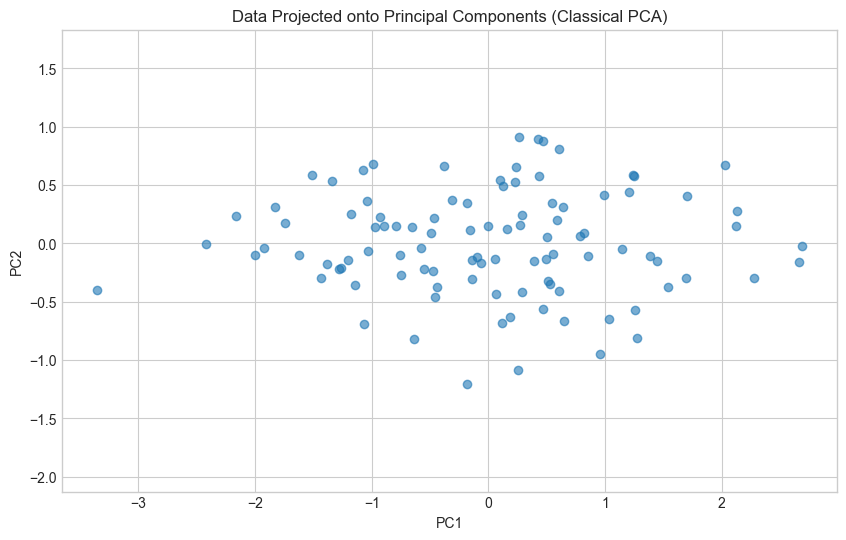

In [15]:
# Transform the original data to principal component space
data_pca = np.dot(data_centered, eigenvectors)

# Plot data in principal component space
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.6)
plt.title('Data Projected onto Principal Components (Classical PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.axis('equal')
plt.show()

The density matrix $\rho$ is constructed from the covariance matrix $\Sigma$
$$\rho = \frac{\Sigma}{\text{Tr}(\Sigma)}$$
The eigendecomposition of $\rho$ gives:
$$\rho = V \Lambda V^{\dagger}$$
Where $Λ$ is a diagonal matrix with eigenvalues $\lambda_1,\lambda_2$ on the diagonal and $V$ is a unitary matrix with eigenvectors as columns

In [16]:
# 4. Quantum PCA Implementation
# Normalize the covariance matrix to create a valid density matrix
trace_cov = np.trace(cov_matrix)
density_matrix = cov_matrix / trace_cov
print("\nNormalized Density Matrix (trace=1):")
print(density_matrix)

# Compute eigendecomposition of the density matrix
evals_dm, evecs_dm = np.linalg.eigh(density_matrix)
# Sort in descending order
idx_dm = evals_dm.argsort()[::-1]
evals_dm = evals_dm[idx_dm]
evecs_dm = evecs_dm[:, idx_dm]

print("\nDensity Matrix Eigenvalues (sorted):")
print(evals_dm)


Normalized Density Matrix (trace=1):
[[0.51091704 0.36867235]
 [0.36867235 0.48908296]]

Density Matrix Eigenvalues (sorted):
[0.86883395 0.13116605]



Density Matrix Preparation Circuit:


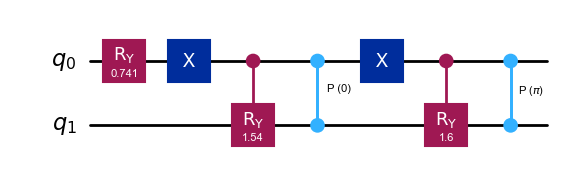

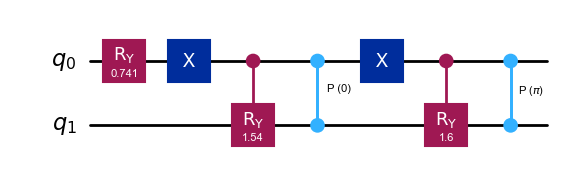

In [17]:
# 5. Density Matrix Encoding (State Preparation)
# For a 2x2 density matrix, we need log2(2) = 1 qubit to represent it

def prepare_density_matrix(density_matrix):
    """
    Prepare a quantum state that encodes the density matrix.
    For a 2x2 density matrix, we use purification with an ancilla qubit.

    Returns a circuit that prepares the state and the indices of the system qubits.
    """
    # Calculate eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eigh(density_matrix)

    # Ensure eigenvalues are sorted in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # For a 2x2 density matrix, we need 1 system qubit and 1 ancilla qubit
    qc = QuantumCircuit(2)

    # Prepare a superposition on the ancilla based on the square root of eigenvalues
    qc.ry(2 * np.arccos(np.sqrt(eigenvalues[0])), 0)

    # Then, conditionally prepare the eigenvectors on the system qubit
    theta0 = 2 * np.arccos(abs(eigenvectors[0, 0]))
    phi0 = np.angle(eigenvectors[1, 0]) - np.angle(eigenvectors[0, 0])

    # Apply to the system qubit controlled on |0⟩ state of the ancilla
    qc.x(0)  # Flip to make it control-on-0
    qc.cry(theta0, 0, 1)
    qc.cp(phi0, 0, 1)
    qc.x(0)  # Flip back

    # For the |1⟩ state of the ancilla, prepare the second eigenvector
    theta1 = 2 * np.arccos(abs(eigenvectors[0, 1]))
    phi1 = np.angle(eigenvectors[1, 1]) - np.angle(eigenvectors[0, 1])

    # Apply to the system qubit controlled on |1⟩ state of the ancilla
    qc.cry(theta1, 0, 1)
    qc.cp(phi1, 0, 1)

    return qc, [1]  # Return the circuit and the system qubit indices

# Create the quantum circuit to prepare our density matrix
density_circuit, system_qubits = prepare_density_matrix(density_matrix)

# Visualize the circuit
print("\nDensity Matrix Preparation Circuit:")
display(density_circuit.draw(output='mpl', style={'figsize': (10, 6)}))

QPE is based on the eigenvalue equation:
$$U |\psi_j\rangle=e^{2\pi i \theta_j} |\psi_j\rangle$$


Simplified Quantum Phase Estimation Circuit for QPCA:


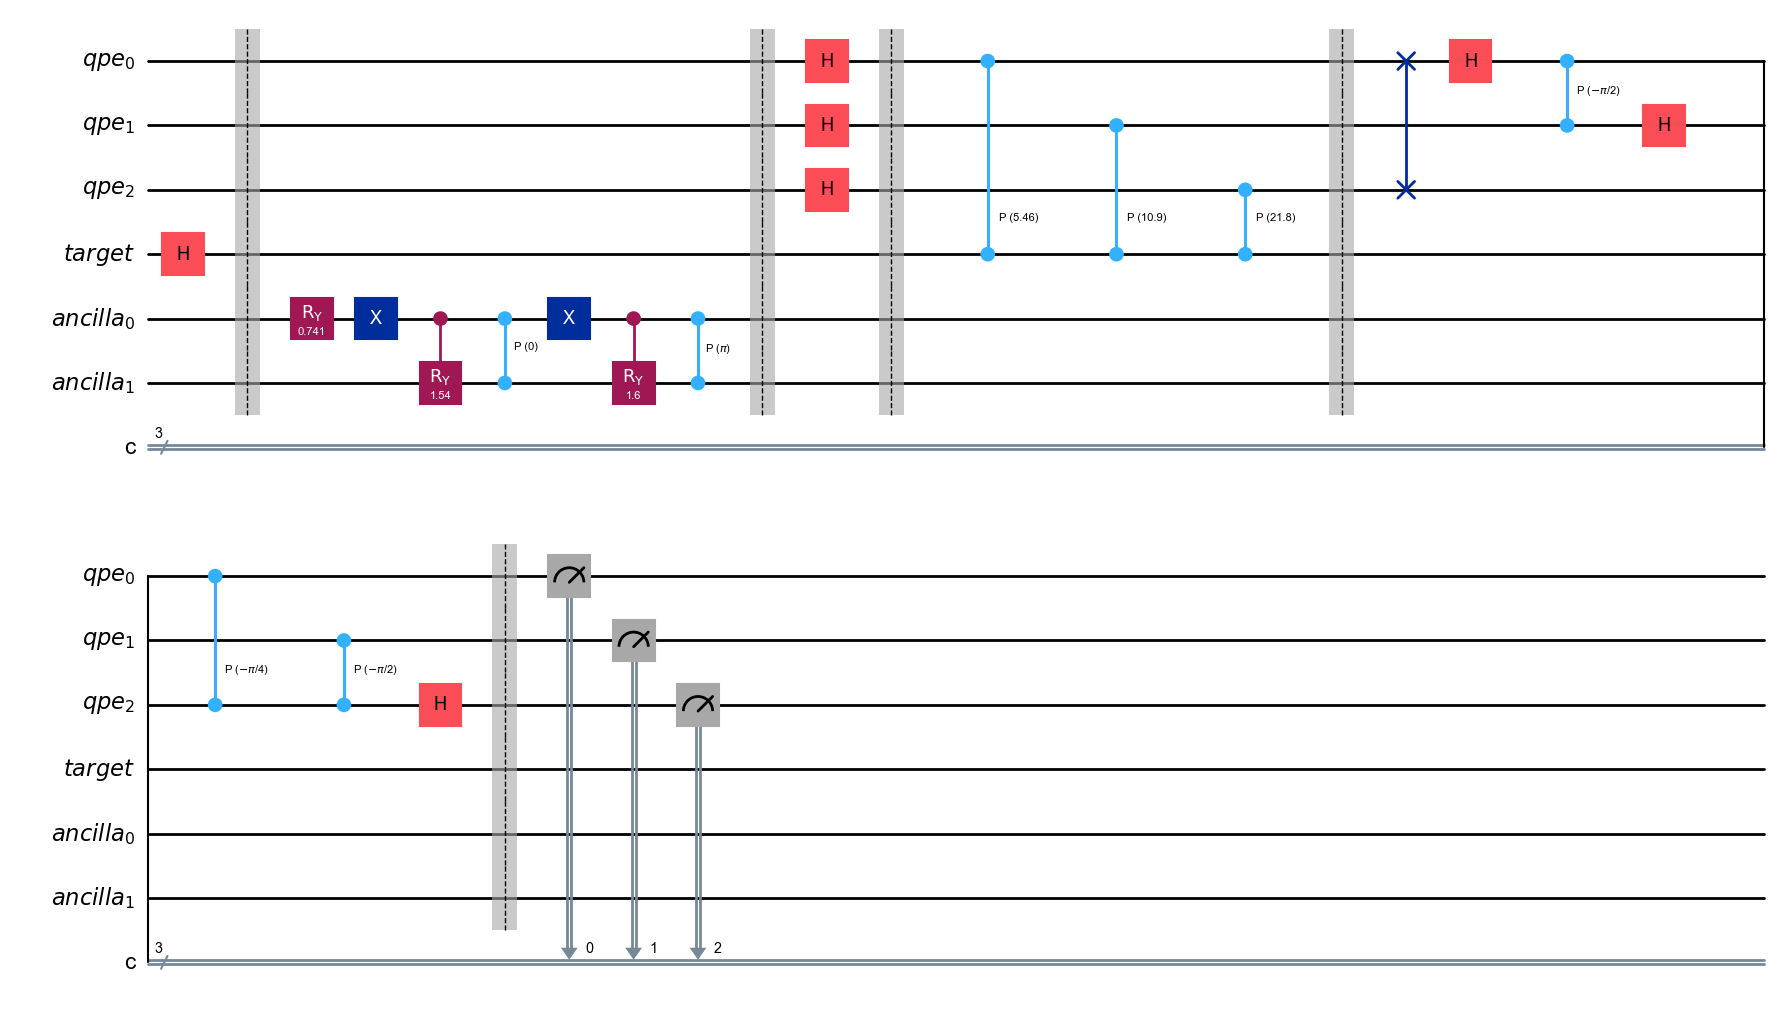

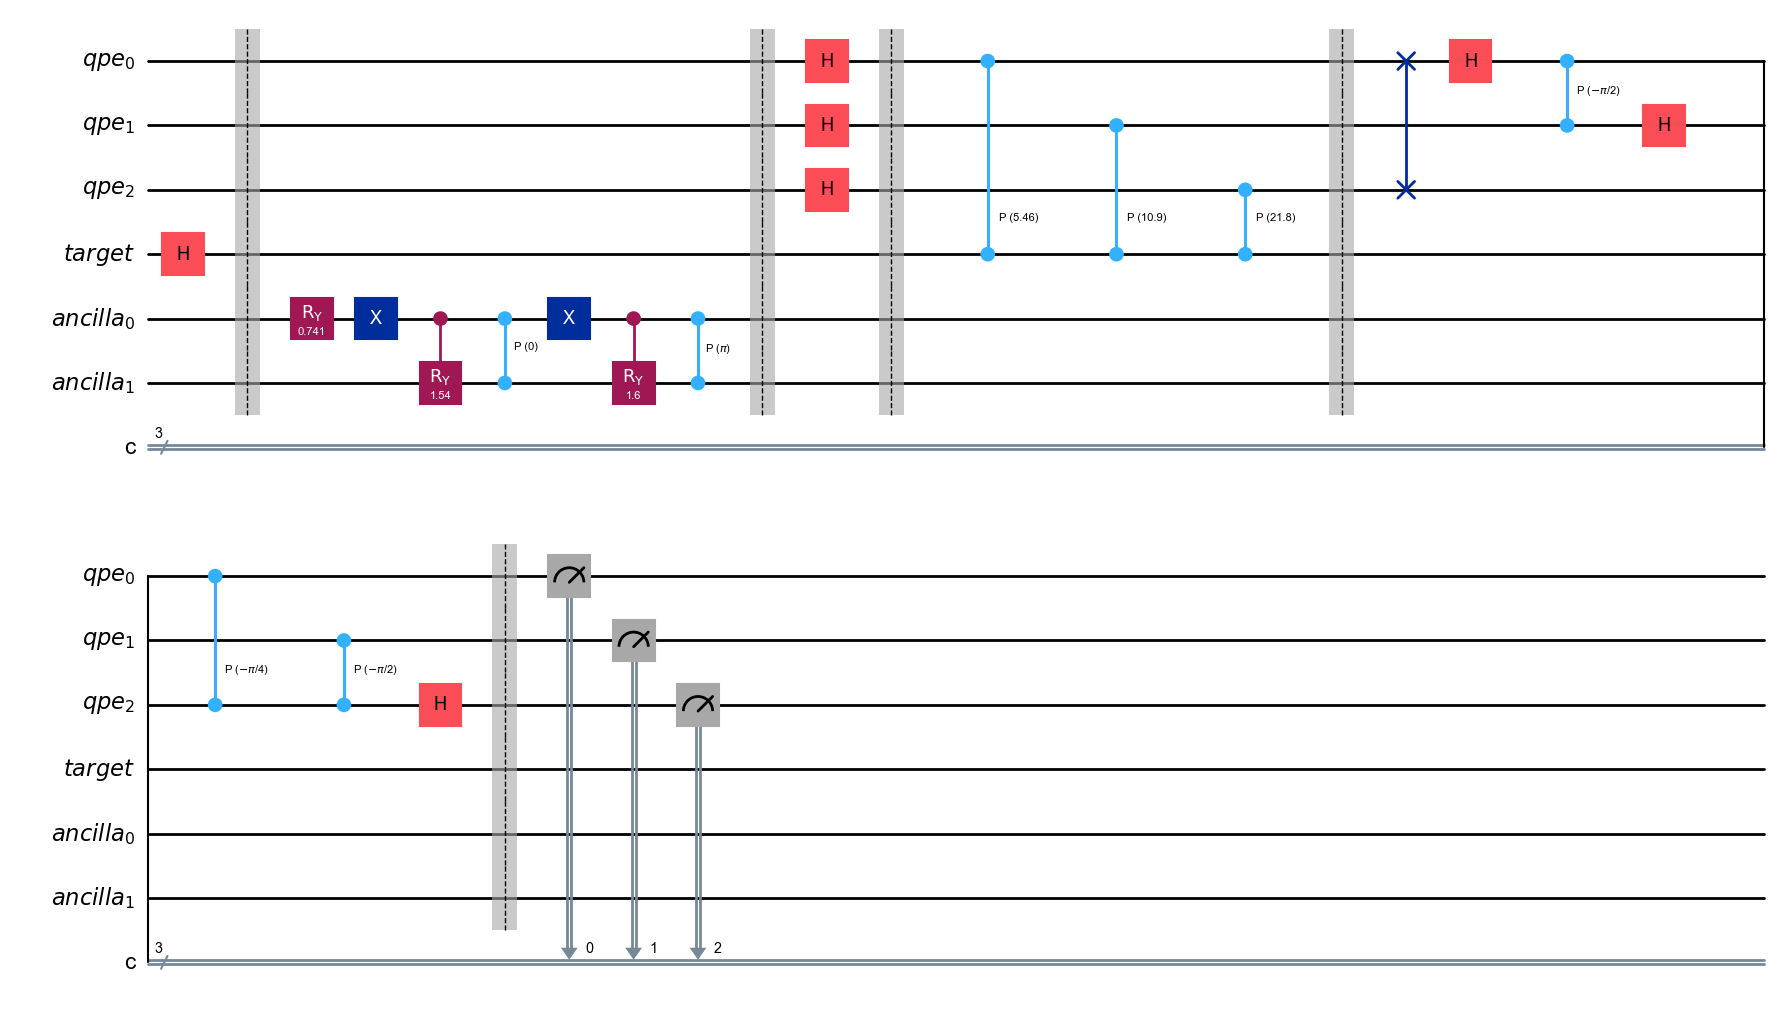

In [18]:
# 7. Implementing a simplified Quantum Phase Estimation for QPCA
def build_qpe_circuit(density_matrix, precision_qubits=3):
    """
    Build a simplified QPE circuit for QPCA

    Args:
        density_matrix: The normalized covariance matrix
        precision_qubits: Number of qubits to use for phase estimation
    """
    # Create registers for the QPE circuit
    qpe_reg = QuantumRegister(precision_qubits, 'qpe')
    target_reg = QuantumRegister(1, 'target')
    # Use only a single copy of the density matrix (2 qubits)
    ancilla_reg = QuantumRegister(2, 'ancilla')
    c_reg = ClassicalRegister(precision_qubits, 'c')

    # Create the circuit
    qc = QuantumCircuit(qpe_reg, target_reg, ancilla_reg, c_reg)

    # Prepare the target qubit in a superposition
    qc.h(target_reg)
    qc.barrier()

    # Prepare a single copy of the density matrix
    density_prep_circuit, _ = prepare_density_matrix(density_matrix)
    qc = qc.compose(density_prep_circuit, ancilla_reg)

    qc.barrier()

    # Apply Hadamards to QPE register
    for i in range(precision_qubits):
        qc.h(qpe_reg[i])

    qc.barrier()

    # Apply controlled-unitary operations
    # For the 2x2 case, we'll use controlled phase rotations based on eigenvalues
    for i in range(precision_qubits):
        power = 2**i

        # Calculate the phase angles based on eigenvalues
        phase_angle_0 = 2 * np.pi * evals_dm[0] * power
        phase_angle_1 = 2 * np.pi * evals_dm[1] * power

        # In a real implementation with multiple copies, we would use different copies
        # Here we just apply the controlled phase directly
        qc.cp(phase_angle_0, qpe_reg[i], target_reg[0])

    qc.barrier()

    # Apply inverse QFT to the precision qubits
    # Manually implement inverse QFT
    for i in range(precision_qubits//2):
        qc.swap(qpe_reg[i], qpe_reg[precision_qubits-i-1])

    for j in range(precision_qubits):
        for k in range(j):
            qc.cp(-np.pi/float(2**(j-k)), qpe_reg[k], qpe_reg[j])
        qc.h(qpe_reg[j])

    qc.barrier()

    # Measure QPE register
    qc.measure(qpe_reg, c_reg)

    return qc

# Build a simplified QPE circuit
precision_qubits = 3  # Reduced precision qubits to keep circuit smaller
qpe_circuit = build_qpe_circuit(density_matrix, precision_qubits)

# Visualize the QPE circuit
print("\nSimplified Quantum Phase Estimation Circuit for QPCA:")
display(qpe_circuit.draw(output='mpl', style={'figsize': (14, 10)}))

In [19]:
# 8. Run the QPE simulation with unrestricted simulator
# Create a simulator with no coupling map restrictions
simulator = AerSimulator(method='statevector')

# Transpile for the simulator
qpe_circuit_transpiled = transpile(qpe_circuit, simulator)

# Run the simulation
shots = 4096
job = simulator.run(qpe_circuit_transpiled, shots=shots)
result = job.result()
counts = result.get_counts()

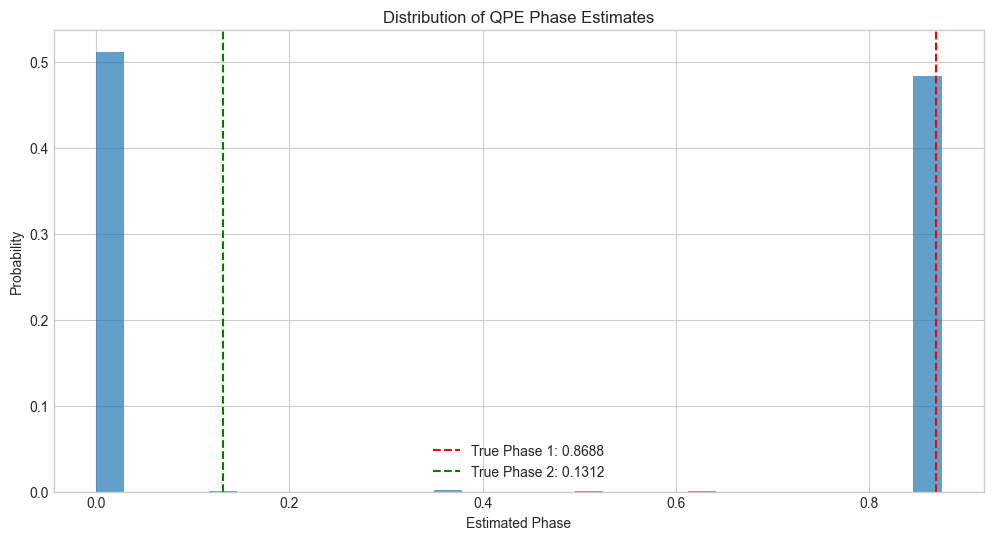

In [20]:
# 9. Process the measurement results to extract eigenvalues
phases = []
probabilities = []

for bitstring, count in counts.items():
    # Convert to phase value (between 0 and 1)
    # Reverse the bitstring to get the correct endian
    phase = int(bitstring[::-1], 2) / (2**precision_qubits)

    # Store with probability
    phases.append(phase)
    probabilities.append(count / shots)

# Show the phase distribution as a histogram
plt.figure(figsize=(12, 6))
plt.hist(phases, weights=probabilities, bins=30, alpha=0.7)
plt.axvline(x=evals_dm[0], color='r', linestyle='--', label=f'True Phase 1: {evals_dm[0]:.4f}')
plt.axvline(x=evals_dm[1], color='g', linestyle='--', label=f'True Phase 2: {evals_dm[1]:.4f}')
plt.xlabel('Estimated Phase')
plt.ylabel('Probability')
plt.title('Distribution of QPE Phase Estimates')
plt.legend()
plt.show()


Estimated Phases from QPE (after clustering): [0.87399396 0.00130455]
Estimated Eigenvalues from QPCA: [1.32797601 0.00198218]
Classical Eigenvalues: [1.32013571 0.19929814]


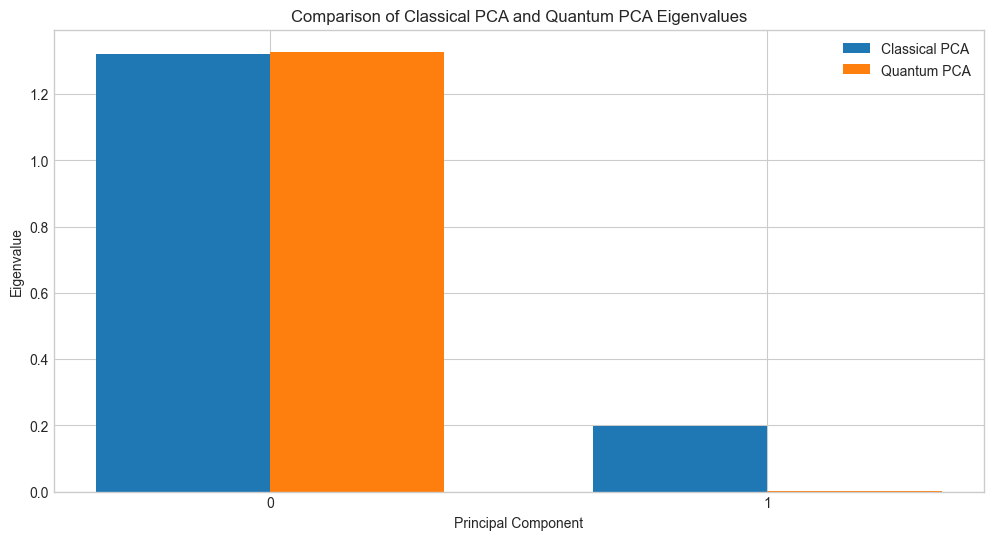

In [21]:
# Find the highest probability phases using clustering
from sklearn.cluster import KMeans

# Reshape for KMeans
X_phases = np.array(phases).reshape(-1, 1)

# Determine optimal number of clusters
n_clusters = min(2, len(phases))  # We have a 2x2 matrix, so maximum 2 eigenvalues

# Perform clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_phases, sample_weight=probabilities)
centers = kmeans.cluster_centers_.flatten()
print("\nEstimated Phases from QPE (after clustering):", centers)

# Convert phases to eigenvalues
estimated_eigenvalues = centers * trace_cov
print("Estimated Eigenvalues from QPCA:", estimated_eigenvalues)
print("Classical Eigenvalues:", eigenvalues)

# Compare classical and quantum results
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(eigenvalues))

# Sort quantum eigenvalues in descending order
sorted_q_eigenvalues = np.sort(estimated_eigenvalues)[::-1]

plt.bar(index - bar_width/2, eigenvalues, bar_width, label='Classical PCA')
plt.bar(index + bar_width/2, sorted_q_eigenvalues[:len(eigenvalues)], bar_width, label='Quantum PCA')

plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Comparison of Classical PCA and Quantum PCA Eigenvalues')
plt.xticks(index)
plt.legend()
plt.show()


=== Eigenvector Comparison ===
Classical PCA Eigenvectors:
[[-0.71749523  0.69656342]
 [-0.69656342 -0.71749523]]

Quantum PCA Eigenvectors (simulated):
[[ 0.71107928 -0.72268497]
 [-0.70311184 -0.69117757]]


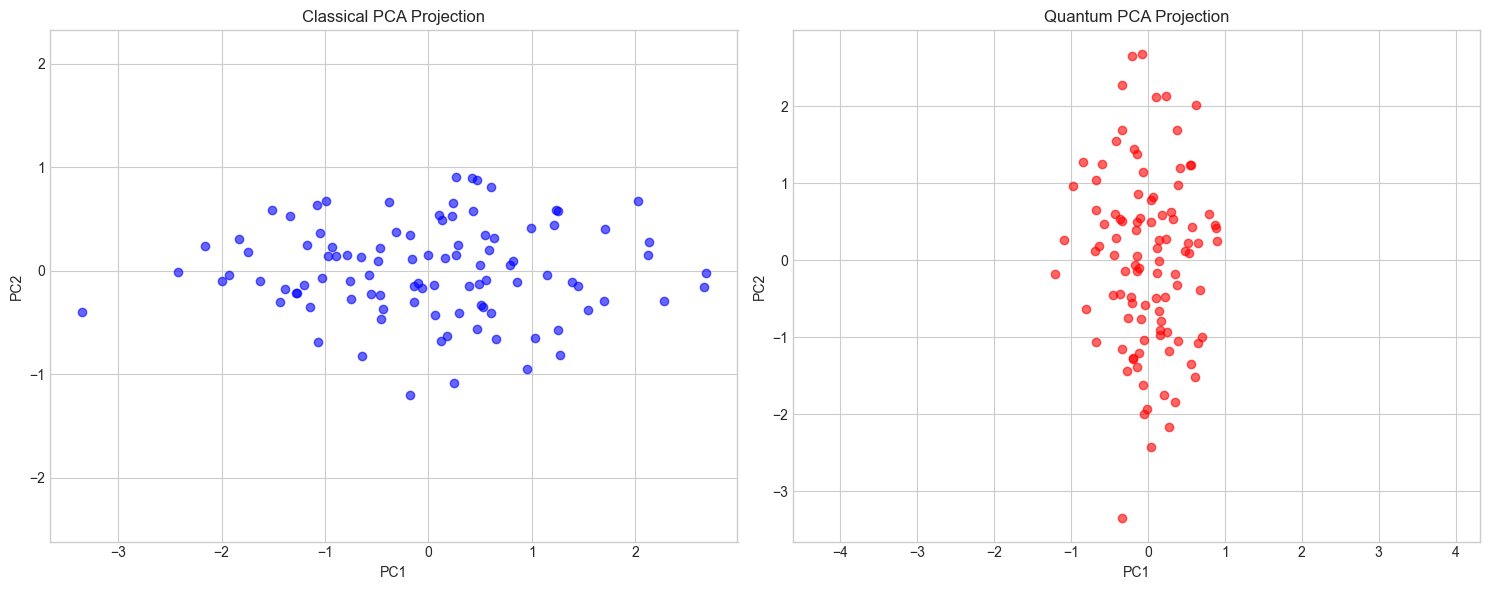

In [22]:
# 10. Simulated Eigenvector Extraction
def simulate_eigenvector_extraction(density_matrix, estimated_eigenvalues):
    """
    Simulate the extraction of eigenvectors from QPE results
    This is a simplified version for educational purposes
    """
    # Get the eigenvectors of the density matrix
    _, eigenvectors = np.linalg.eigh(density_matrix)
    idx = np.argsort(np.diag(density_matrix))[::-1]
    eigenvectors = eigenvectors[:, idx]

    # In a real quantum scenario, we would need to perform measurements on
    # the target qubit after post-selecting on specific QPE results
    # Here we'll just add some simulated measurement noise to the eigenvectors

    # Add some simulated measurement noise
    noise_level = 0.02
    noisy_eigenvectors = eigenvectors + np.random.normal(0, noise_level, eigenvectors.shape)

    # Renormalize the vectors
    for i in range(noisy_eigenvectors.shape[1]):
        noisy_eigenvectors[:, i] = noisy_eigenvectors[:, i] / np.linalg.norm(noisy_eigenvectors[:, i])

    return noisy_eigenvectors

# Get simulated eigenvectors
q_eigenvectors = simulate_eigenvector_extraction(density_matrix, estimated_eigenvalues)

print("\n=== Eigenvector Comparison ===")
print("Classical PCA Eigenvectors:")
print(eigenvectors)
print("\nQuantum PCA Eigenvectors (simulated):")
print(q_eigenvectors)

# Project the data onto the quantum principal components
data_qpca = np.dot(data_centered, q_eigenvectors)

# Compare classical and quantum projections
plt.figure(figsize=(15, 6))

# Classical PCA projection
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.6, c='blue')
plt.title('Classical PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.axis('equal')

# Quantum PCA projection
plt.subplot(1, 2, 2)
plt.scatter(data_qpca[:, 0], data_qpca[:, 1], alpha=0.6, c='red')
plt.title('Quantum PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()

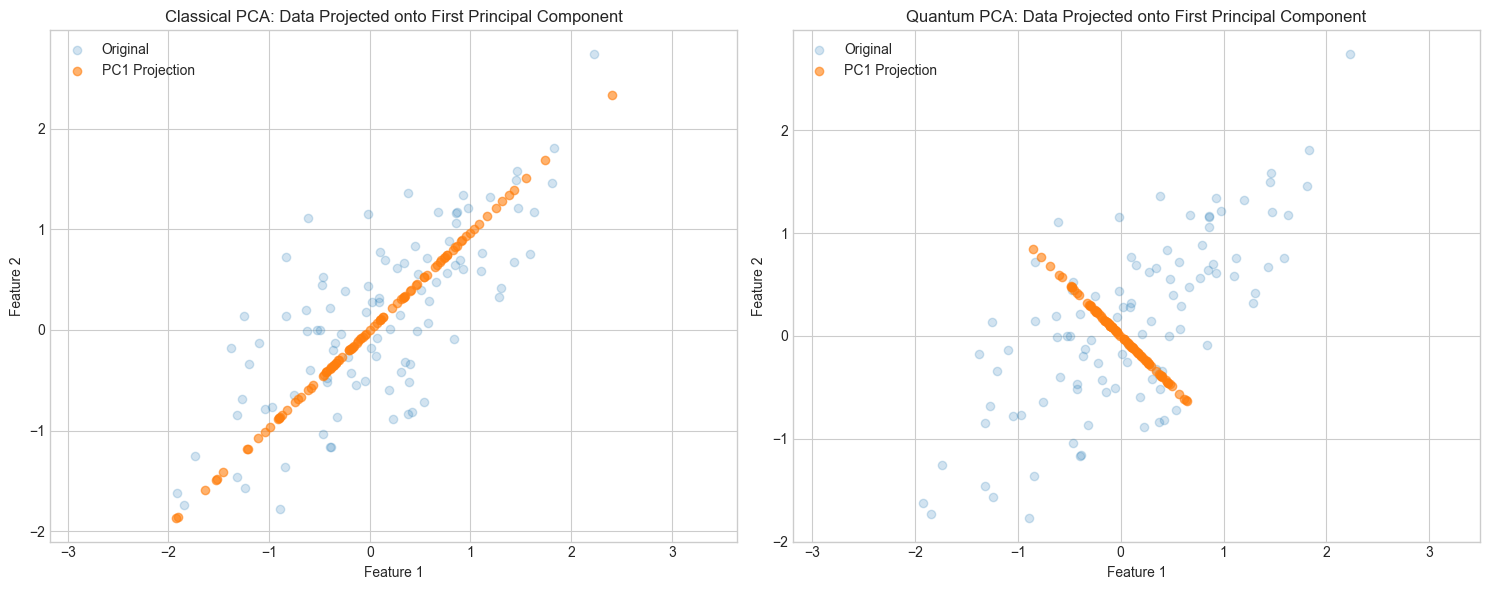

In [23]:
# 11. Visualize the original data with principal components
plt.figure(figsize=(15, 6))

# 1. Classical PCA Projection
plt.subplot(1, 2, 1)
# Project data onto first principal component
# We project onto the eigenvector, then translate back to original space
proj_data_pca = np.outer(data_centered.dot(eigenvectors[:, 0]), eigenvectors[:, 0]) + mean
# Scatter plots
plt.scatter(data[:, 0], data[:, 1], alpha=0.2, label='Original')
plt.scatter(proj_data_pca[:, 0], proj_data_pca[:, 1], alpha=0.6, label='PC1 Projection')

scale_factor = 3
plt.title('Classical PCA: Data Projected onto First Principal Component')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.axis('equal')
plt.grid(True)

# 2. Quantum PCA Projection
plt.subplot(1, 2, 2)


# Project data onto first QPCA principal component
proj_data_qpca = np.outer(data_centered.dot(q_eigenvectors[:, 0]), q_eigenvectors[:, 0]) + mean
# Scatter plots
plt.scatter(data[:, 0], data[:, 1], alpha=0.2, label='Original')
plt.scatter(proj_data_qpca[:, 0], proj_data_qpca[:, 1], alpha=0.6, label='PC1 Projection')

plt.title('Quantum PCA: Data Projected onto First Principal Component')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.axis('equal')
plt.grid(True)

plt.tight_layout()
plt.show()

# Quantum PCA Implementation Details
## 1. State Preparation
Purification is used to represent the density matrix
A 2x2 density matrix requires 1 system qubit and 1 ancilla qubit
The density matrix is encoded in the reduced state of the system qubit
## 2. About Multiple Copies
In theory, for QPE with controlled-$U^(2^j)$, we need multiple copies of the state
Total copies needed is 2^precision_qubits - 1 in general
For this simulation, we simplified to use direct phase rotations
In a real quantum implementation, we would need these multiple copies
## 3. Quantum Phase Estimation
Uses quantum parallelism to estimate eigenvalues
The phase register encodes eigenvalues as binary fractions
Inverse QFT converts phase kickback into readable binary values
## 4. Eigenvector Extraction
Post-selection on QPE measurements would give eigenvectors
In a real quantum computer, measuring the target register after post-selection would give the corresponding eigenvector
## 5. The Full QPCA Pipeline
Prepare quantum state representing the covariance matrix
Use QPE to extract eigenvalues
Post-select to extract corresponding eigenvectors
Project data onto the quantum principal components